*                   Tesla Stock Price Prediction*

Import Libraries :

First, import all the required libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Load the Dataset


In [ ]:
df= pd.read_csv('/content/TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400
2955,2022-03-24,1009.729980,1024.489990,988.799988,1013.919983,1013.919983,22901900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2956.0,1.386913e+02,2.500448e+02,3.228,1.962700e+01,4.665700e+01,6.805700e+01,1.234410e+03
High,2956.0,1.417716e+02,2.558632e+02,3.326,2.040200e+01,4.748700e+01,6.935750e+01,1.243490e+03
Low,2956.0,1.354260e+02,2.437742e+02,2.996,1.912750e+01,4.582000e+01,6.691150e+01,1.217000e+03
Close,2956.0,1.387622e+02,2.501231e+02,3.160,1.961500e+01,4.654500e+01,6.810400e+01,1.229910e+03
Adj Close,2956.0,1.387622e+02,2.501231e+02,3.160,1.961500e+01,4.654500e+01,6.810400e+01,1.229910e+03
Volume,2956.0,3.131449e+07,2.798383e+07,592500.000,1.310288e+07,2.488680e+07,3.973875e+07,3.046940e+08


### Data Visualization

<Axes: >

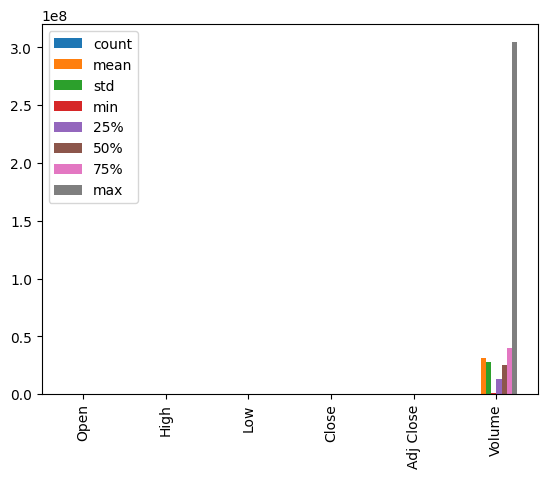

In [ ]:
df.describe().T.plot(kind='bar')

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,2956,2956,2010-06-29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,2956.0,NaN,NaN,NaN,138.691296,250.044839,3.228,19.627,46.656999,68.057001,1234.410034
High,2956.0,NaN,NaN,NaN,141.771603,255.863239,3.326,20.402,47.487001,69.3575,1243.48999
Low,2956.0,NaN,NaN,NaN,135.425953,243.774157,2.996,19.1275,45.820002,66.911501,1217.0
Close,2956.0,NaN,NaN,NaN,138.762183,250.123115,3.16,19.615,46.545,68.103998,1229.910034
Adj Close,2956.0,NaN,NaN,NaN,138.762183,250.123115,3.16,19.615,46.545,68.103998,1229.910034
Volume,2956.0,NaN,NaN,NaN,31314485.723951,27983828.756905,592500.0,13102875.0,24886800.0,39738750.0,304694000.0


Plot the Closing Price over Time

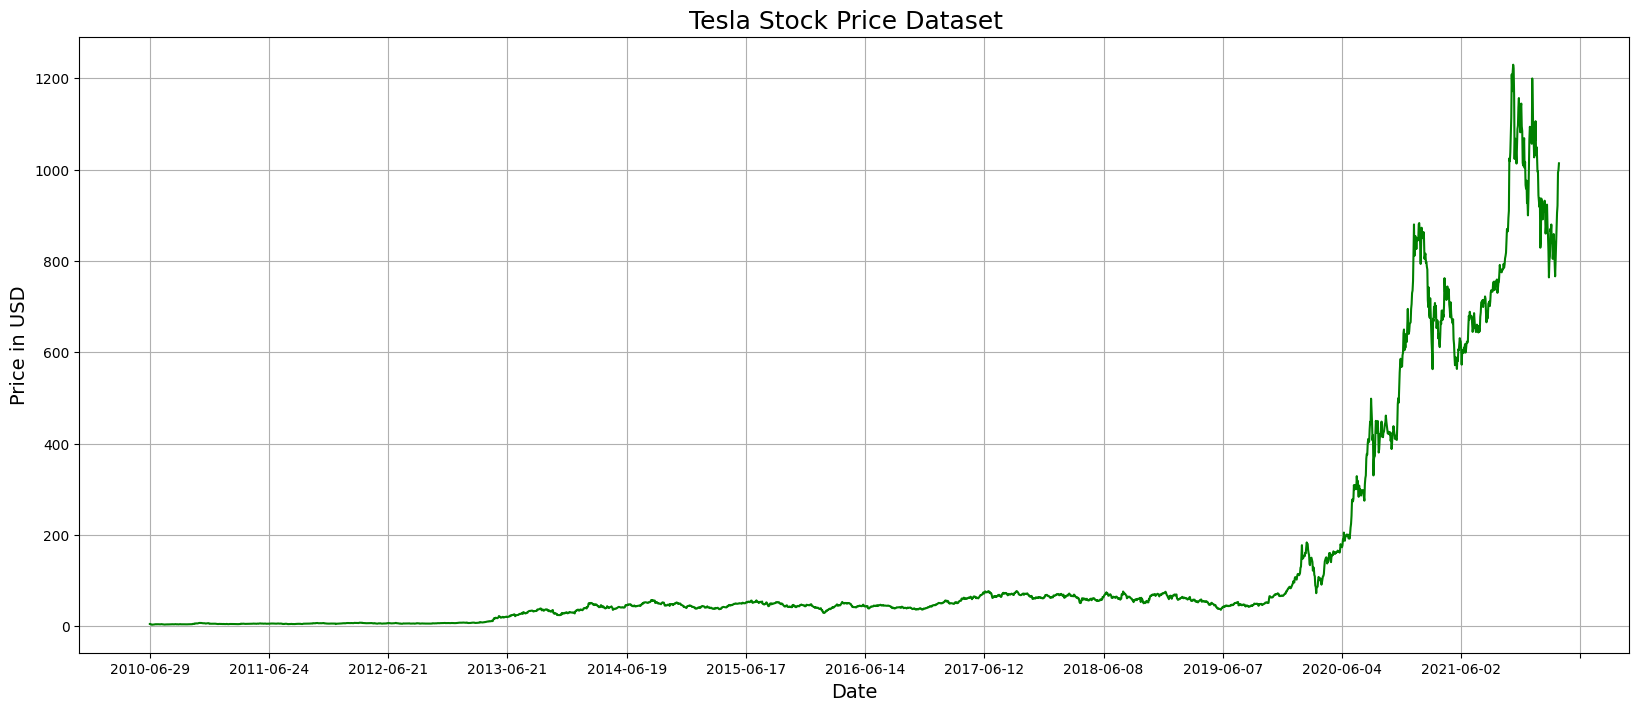

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df['Date'], df['Close'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price in USD', fontsize=14)
plt.title('Tesla Stock Price Dataset  ', fontsize=18)
plt.grid()
plt.show()

Bar Plot of Closing Prices

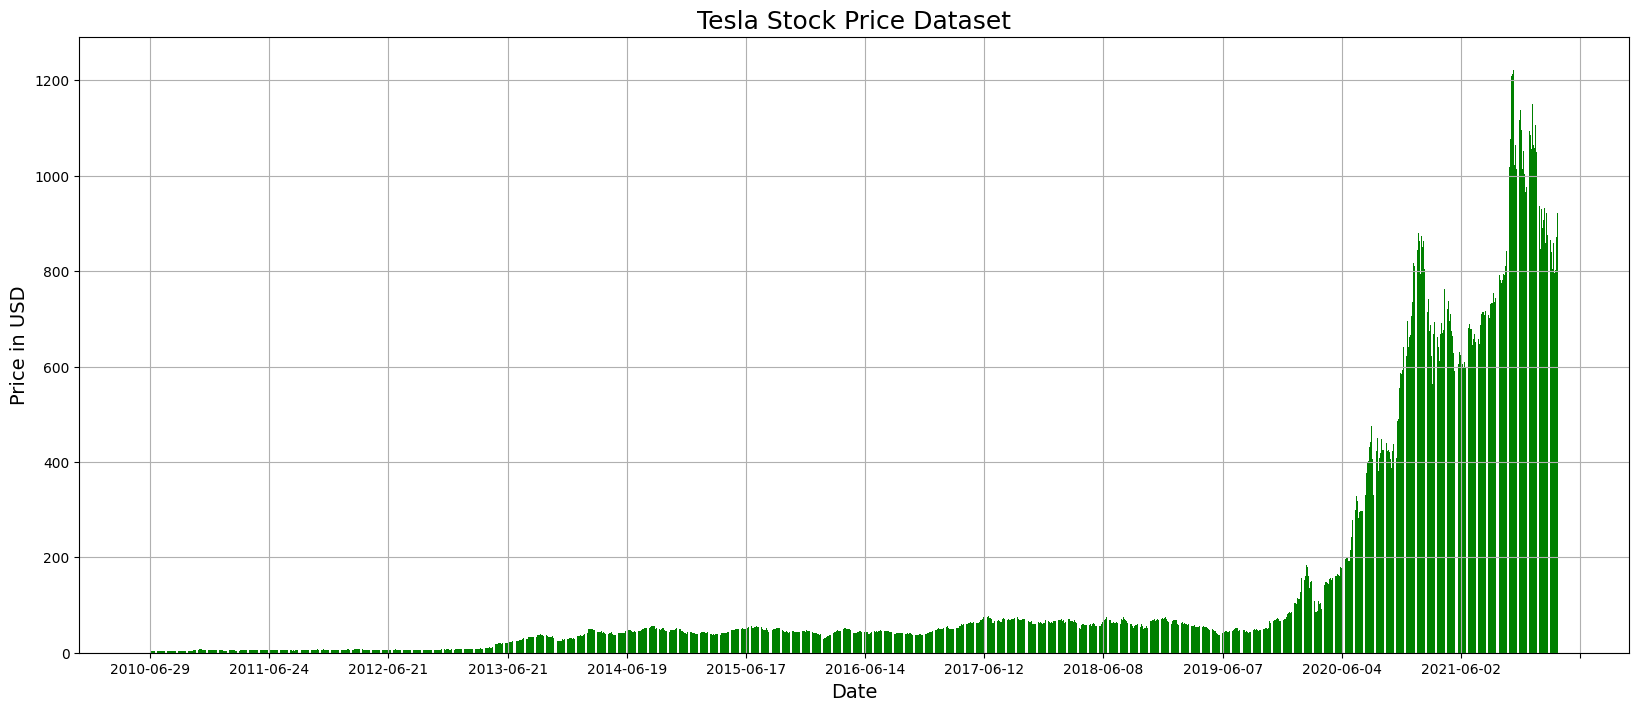

In [ ]:
# Bar plot
fig2, ax = plt.subplots(figsize=(20, 8))
ax.bar(df['Date'], df['Close'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price in USD', fontsize=14)
plt.title('Tesla Stock Price Dataset', fontsize=18)
plt.grid()
plt.show()

Histogram of All Numeric Columns

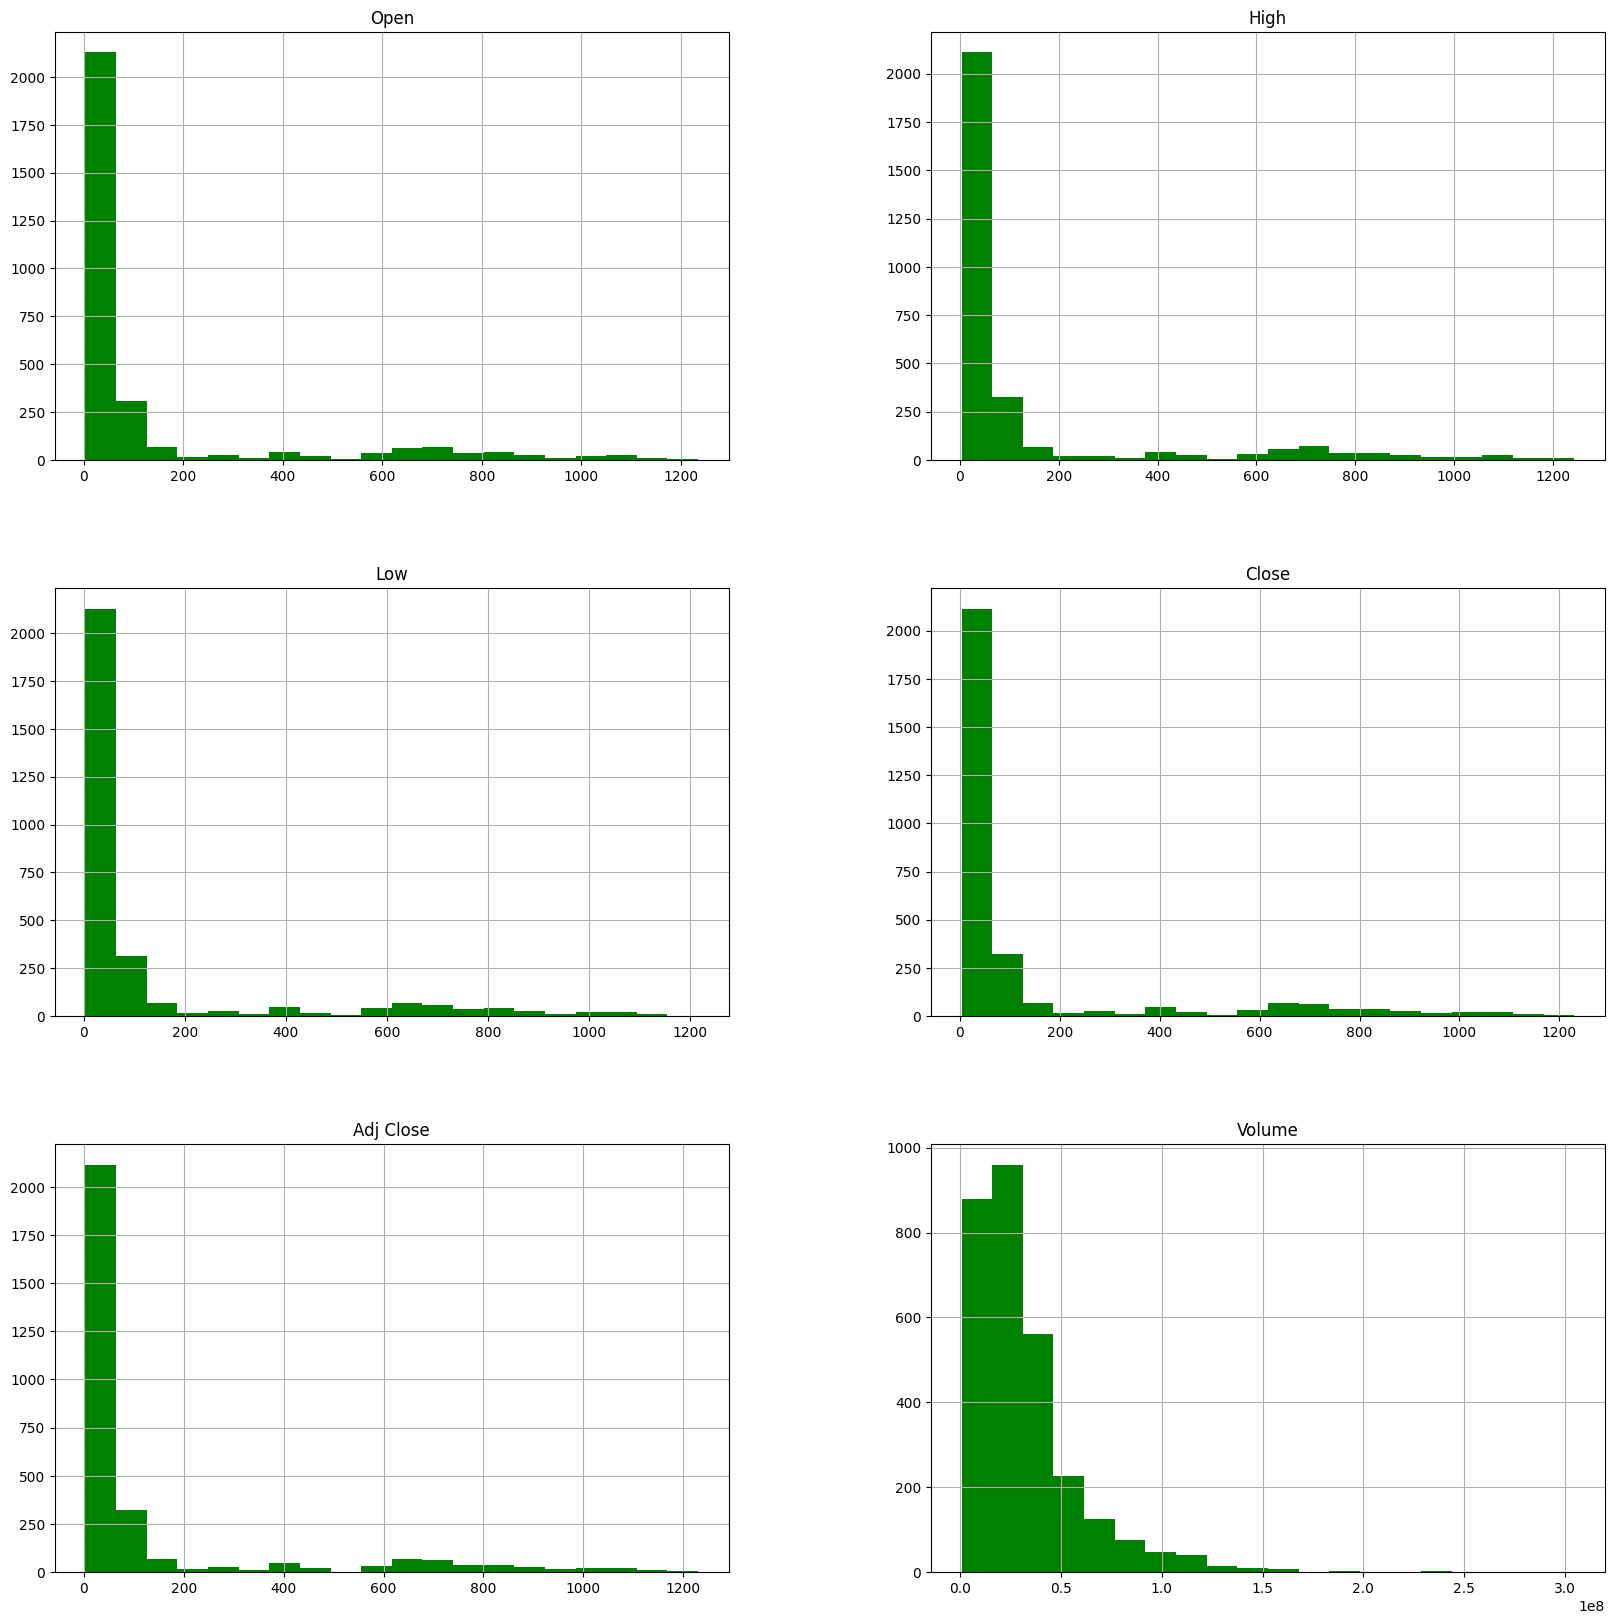

In [ ]:
df.hist(bins = 20, figsize = (20,20), color = 'g')
plt.show()

In [ ]:
df.columns.to_list()

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

Plotly Express Histograms

In [ ]:
from plotly import express

for column in ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    express.histogram(data_frame=df, x=column).show()

Correlation Matrix Heatmap

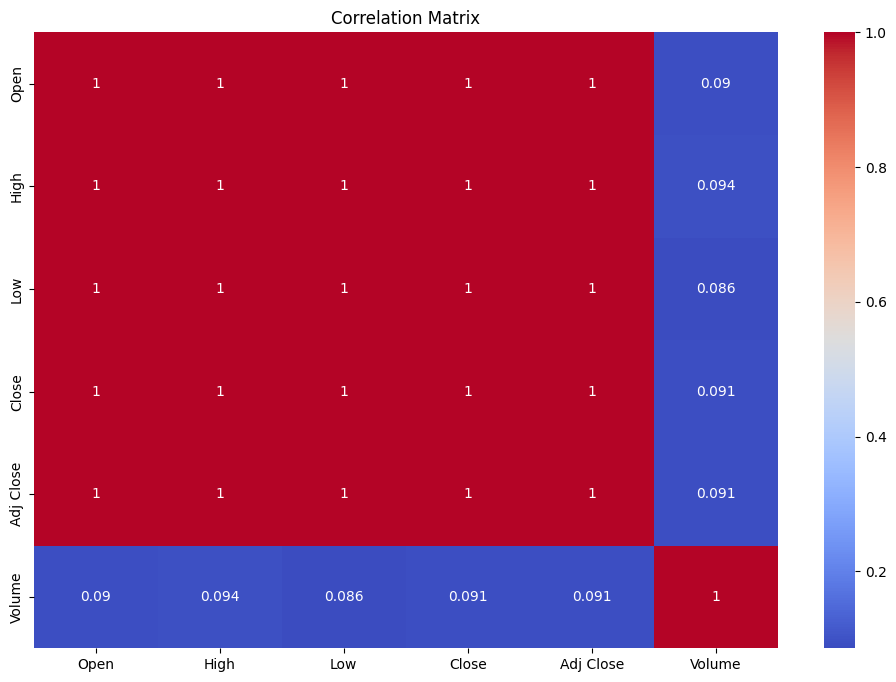

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns  # اختيار الأعمدة الرقمية فقط
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Train a Random Forest Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

features = ["Open", "High", "Low", "Volume"]
#select the elements
X = df[features]
y = df["Close"]

#the goal
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = RandomForestRegressor()

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 33.47142785925941


Plot Actual vs. Predicted Closing Prices

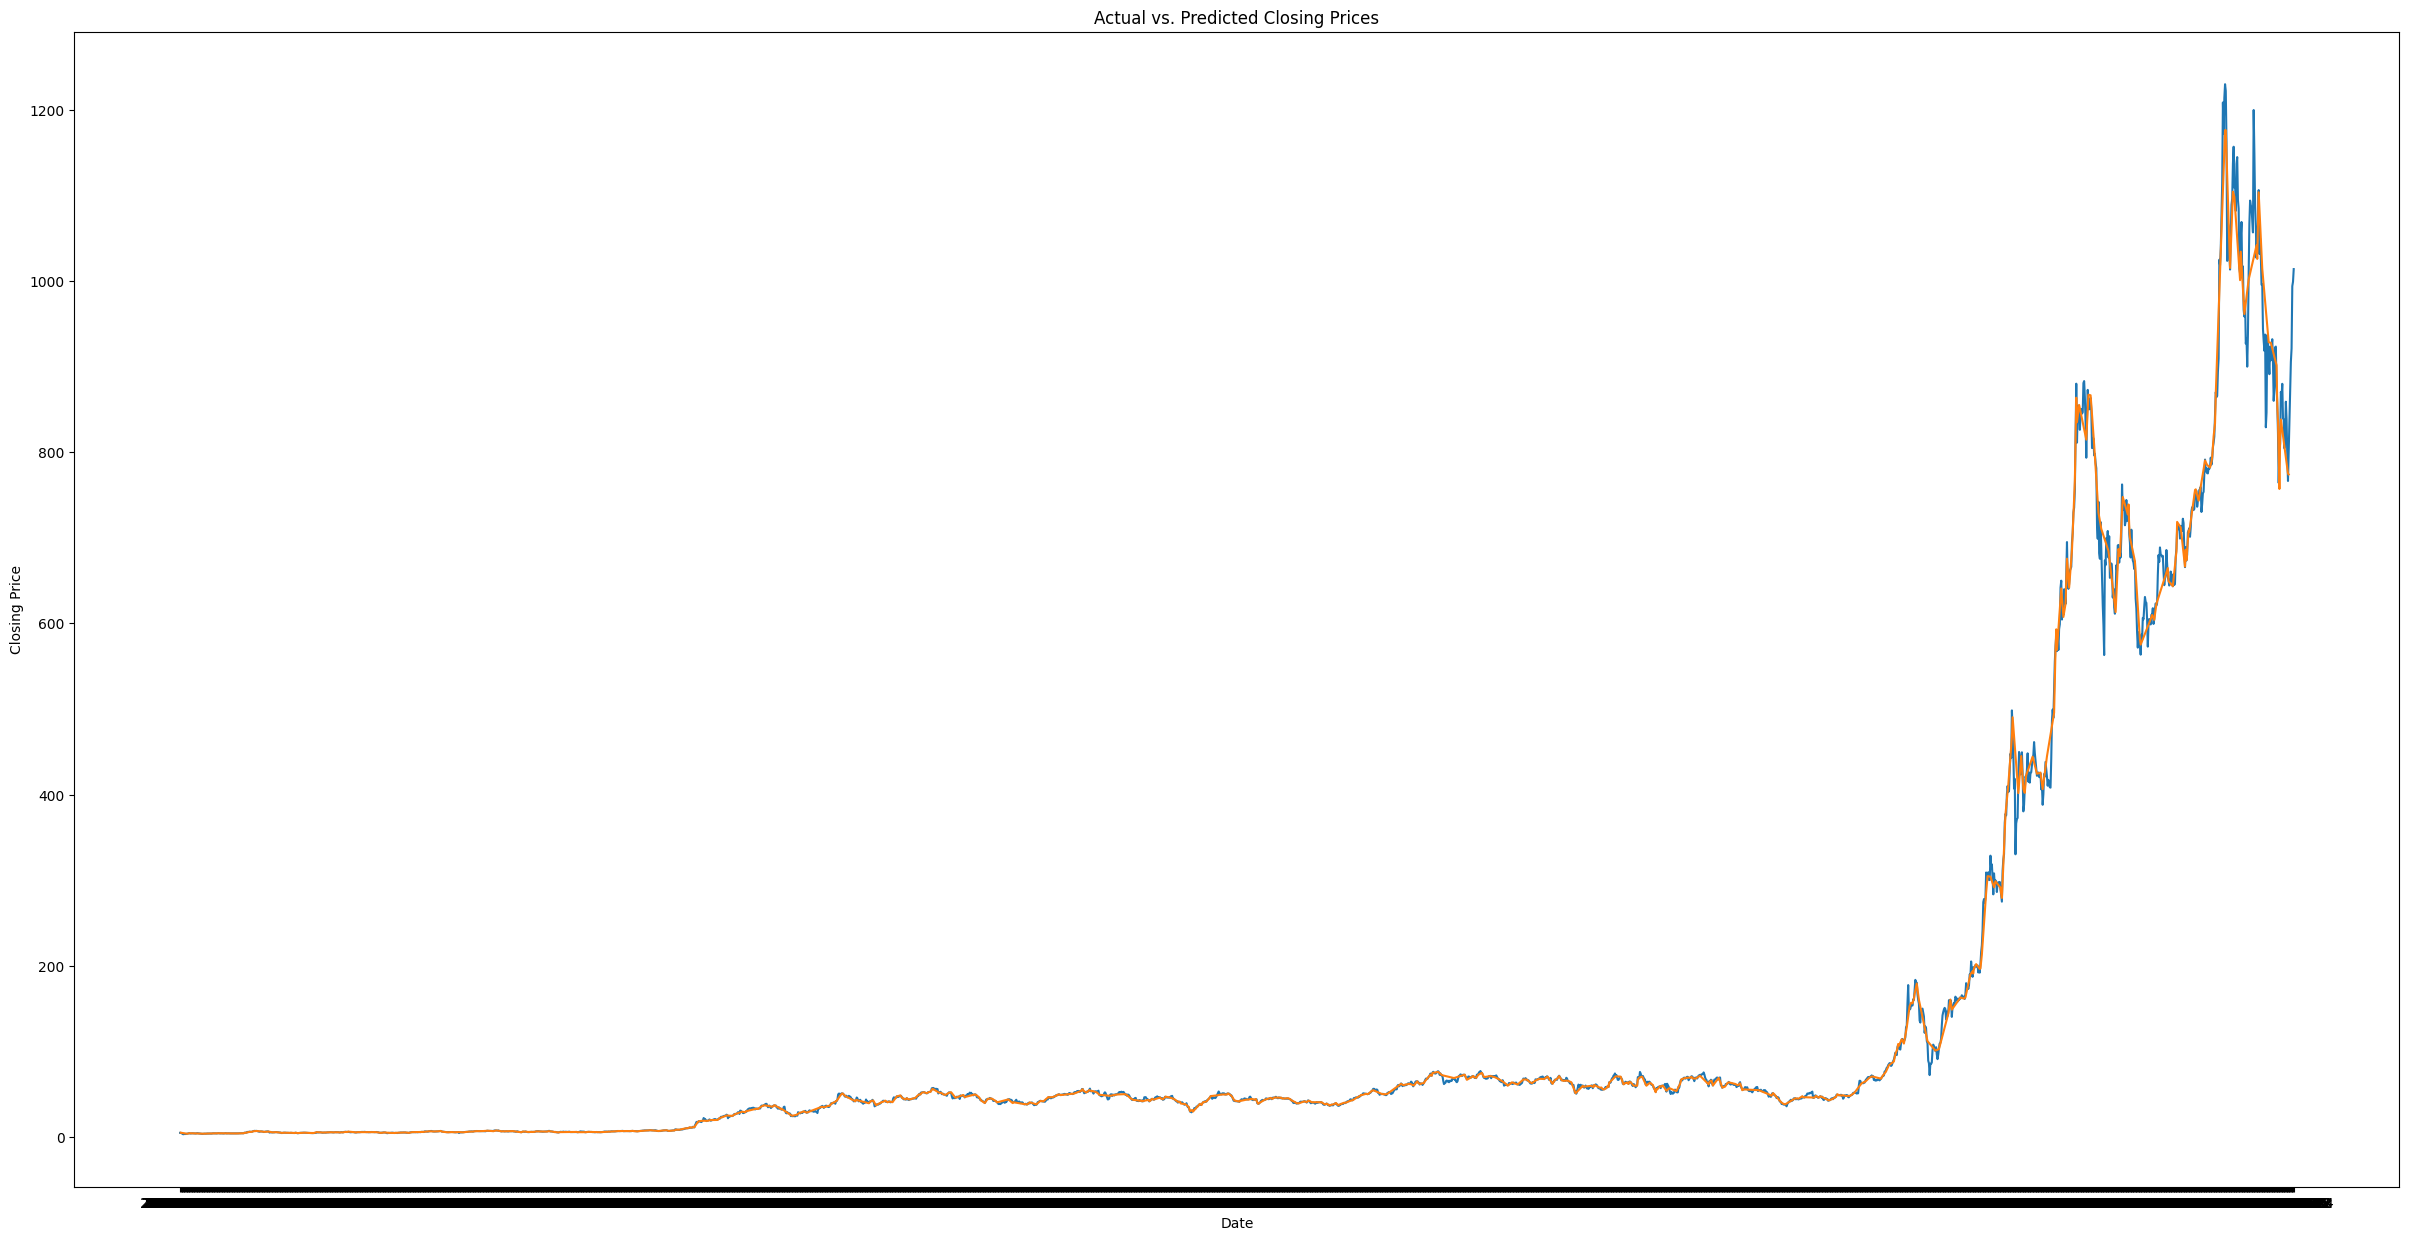

In [ ]:
prediction_y = model.predict(X_test)#prediction output

dates =  df.iloc[X_test.index]["Date"]

prediction_df = pd.DataFrame({"Date": dates, "Predicted Closing Price": prediction_y})
prediction_df.sort_values("Date", inplace=True)

#draw the graph
plt.figure(figsize = (30,15))
plt.plot(df["Date"], df["Close"], label = "Actual Closing Price")
plt.plot(prediction_df["Date"], prediction_df["Predicted Closing Price"], label = "Predicted Closing Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Actual vs. Predicted Closing Prices")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification


In [ ]:
# Load the dataset
df = pd.read_csv('/content/TSLA.csv')

# For demonstration purposes, we need a classification dataset.
# Since the Tesla dataset is a regression problem, we'll use a synthetic dataset for classification.
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing the bootstrapping algorithm
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    indices = np.random.choice(n_samples, size=n_samples, replace=True)
    return X[indices], y[indices]

In [ ]:
# Training the Random Forest Classifier with bootstrapping
n_trees = 100
forest = []

for _ in range(n_trees):
    X_sample, y_sample = bootstrap_sample(X_train, y_train)
    tree = RandomForestClassifier(n_estimators=1, bootstrap=False)
    tree.fit(X_sample, y_sample)
    forest.append(tree)

In [ ]:
# Making predictions
def forest_predict(forest, X):
    tree_preds = np.array([tree.predict(X) for tree in forest])
    return np.squeeze(np.apply_along_axis(lambda x: np.bincount(x, minlength=2).argmax(), arr=tree_preds, axis=0))

y_pred = forest_predict(forest, X_test)

Accuracy: 0.925
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       107
           1       0.90      0.95      0.92        93

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200



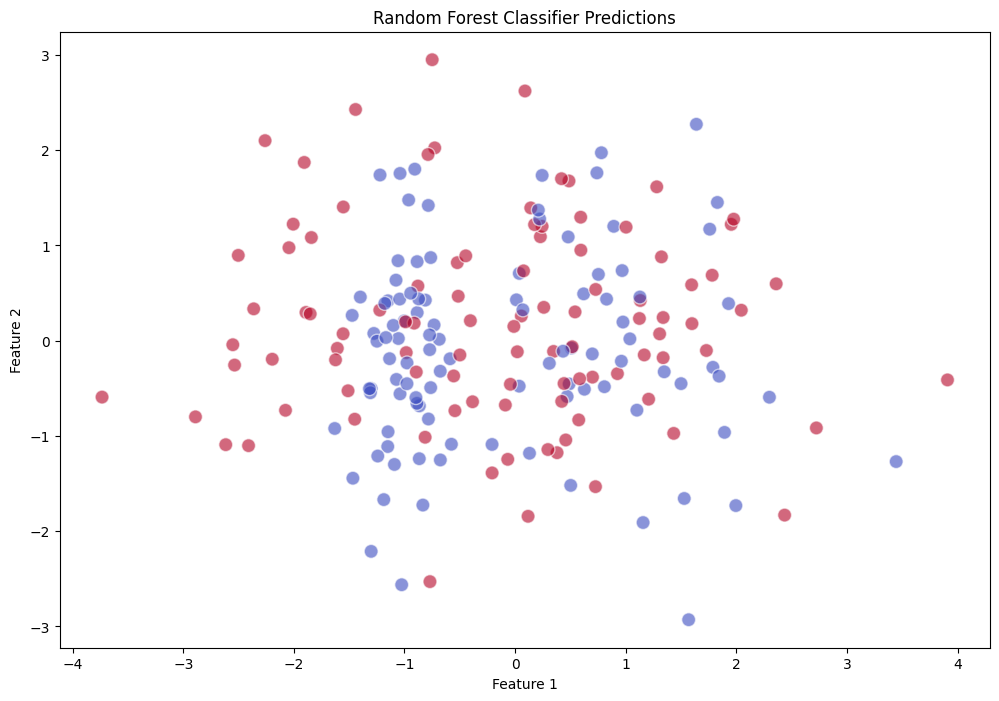

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plotting the first two features of the dataset for visualization
plt.figure(figsize=(12, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', alpha=0.6, edgecolor='w', s=100)
plt.title("Random Forest Classifier Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Decision Tree Classifier


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification

In [ ]:
# For demonstration purposes, we need a classification dataset.
# Since the Tesla dataset is a regression problem, we'll use a synthetic dataset for classification.
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Making predictions
y_pred = tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       107
           1       0.86      0.91      0.89        93

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



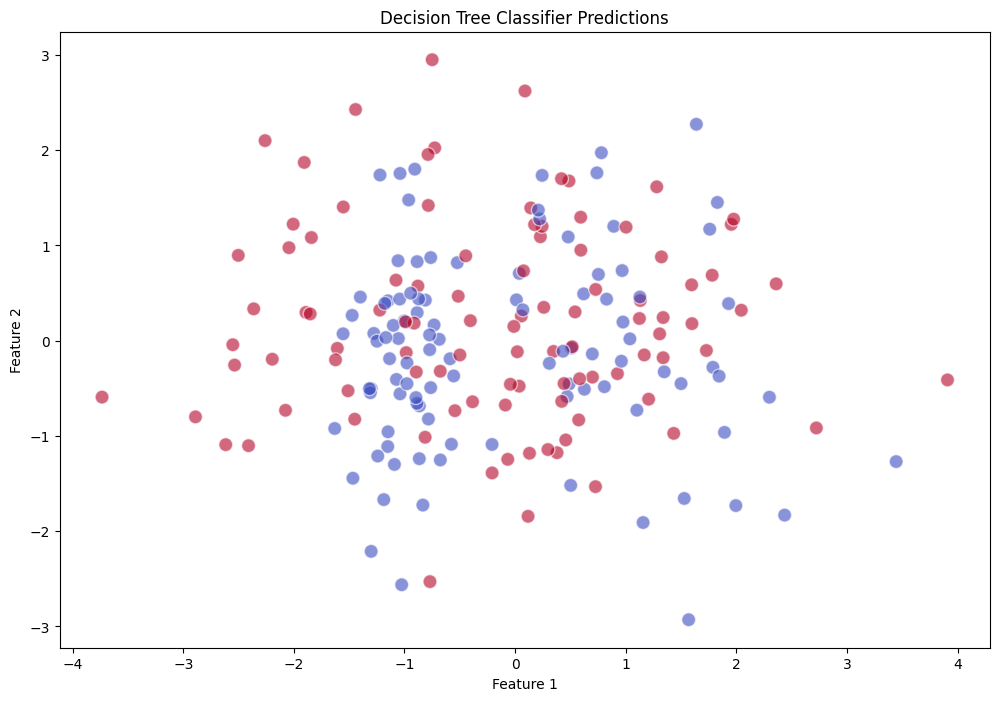

In [ ]:
# Plotting the first two features of the dataset for visualization
plt.figure(figsize=(12, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', alpha=0.6, edgecolor='w', s=100)
plt.title("Decision Tree Classifier Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
# Implementing the bootstrapping algorithm
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    indices = np.random.choice(n_samples, size=n_samples, replace=True)
    return X[indices], y[indices]

# Training multiple Decision Tree Classifiers with bootstrapping
n_trees = 100
forest = []

for _ in range(n_trees):
    X_sample, y_sample = bootstrap_sample(X_train, y_train)
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_sample, y_sample)
    forest.append(tree)

In [ ]:
# Making predictions
def forest_predict(forest, X):
    tree_preds = np.array([tree.predict(X) for tree in forest])
    return np.squeeze(np.apply_along_axis(lambda x: np.bincount(x, minlength=2).argmax(), arr=tree_preds, axis=0))

y_pred = forest_predict(forest, X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.935
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       107
           1       0.93      0.94      0.93        93

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



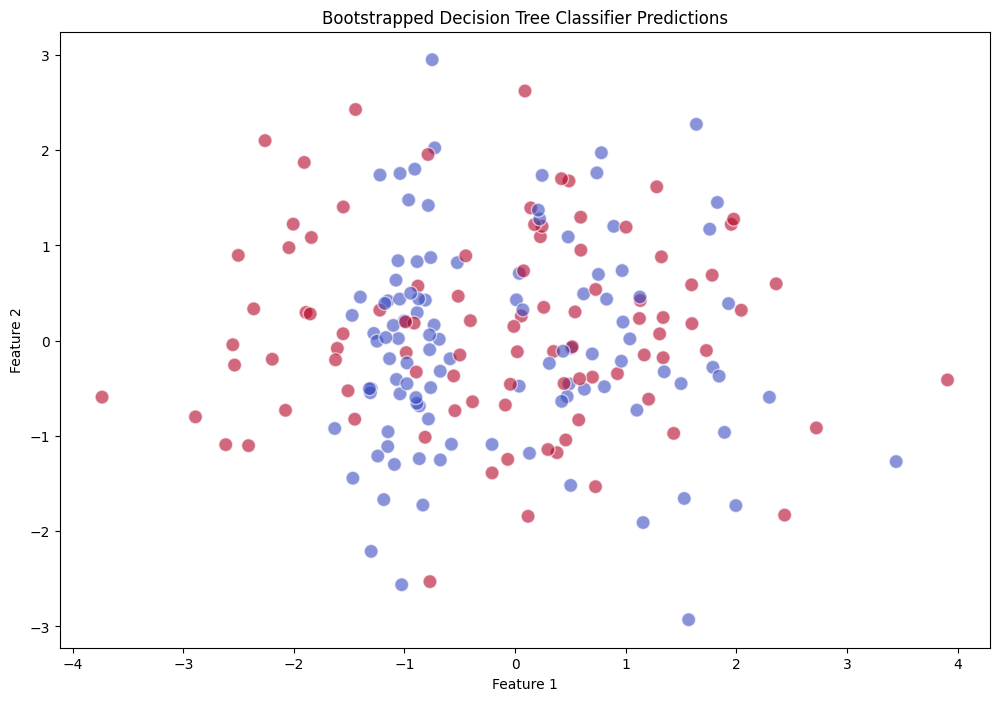

In [ ]:
# Plotting the first two features of the dataset for visualization
plt.figure(figsize=(12, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', alpha=0.6, edgecolor='w', s=100)
plt.title("Bootstrapped Decision Tree Classifier Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
# For demonstration purposes, create a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Convert to DataFrame for easier manipulation
feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df['Target'], test_size=0.2, random_state=42)

# Train a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Calculate the correlation matrix for the features
correlation_matrix = df[feature_names].corr()

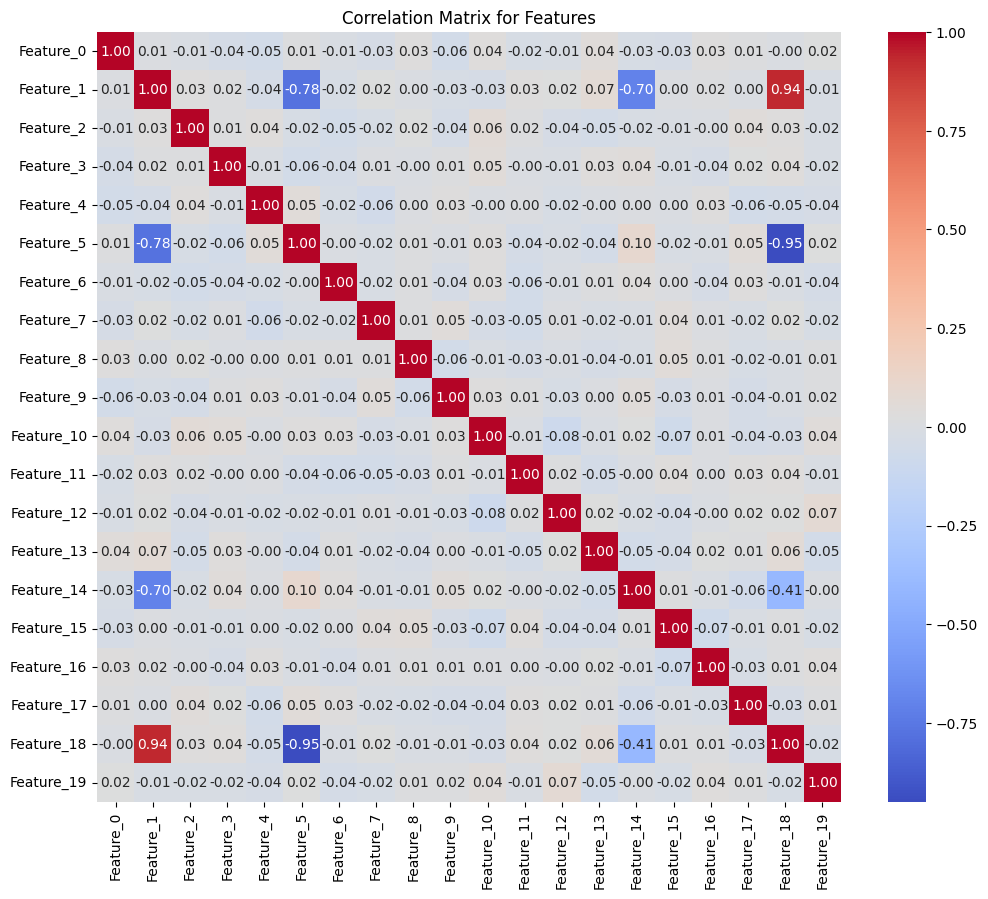

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Features')
plt.show()


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Training the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Making predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.855
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



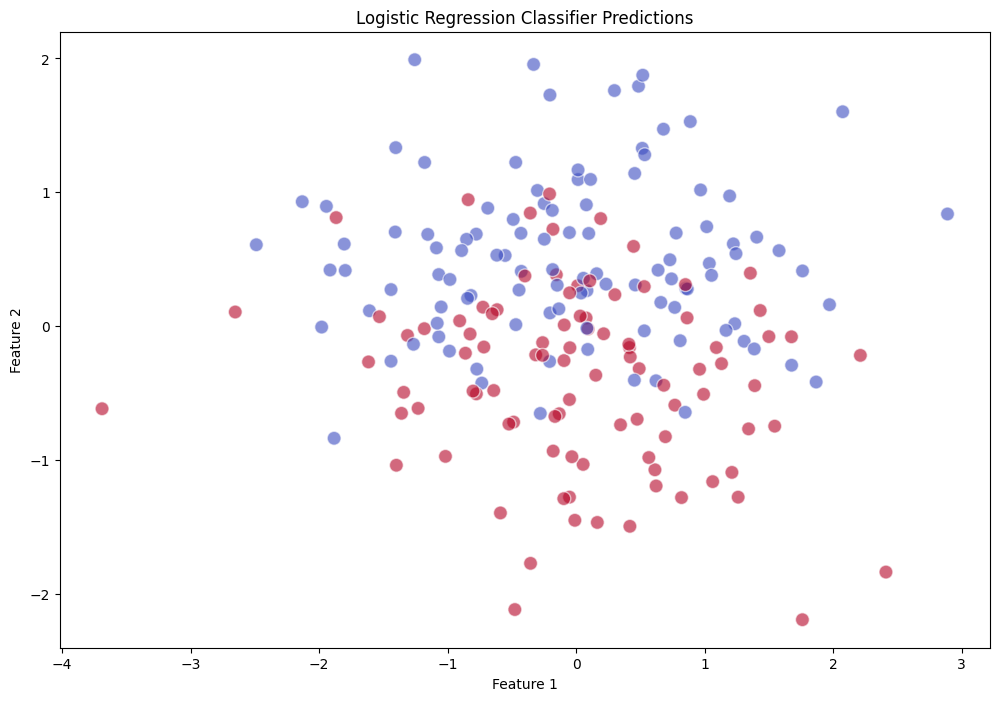

In [ ]:
# Plotting the first two features of the dataset for visualization
plt.figure(figsize=(12, 8))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='coolwarm', alpha=0.6, edgecolor='w', s=100)
plt.title("Logistic Regression Classifier Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
# For demonstration purposes, create a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Convert to DataFrame for easier manipulation
feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df['Target'], test_size=0.2, random_state=42)

# Train a Logistic Regression classifier
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Calculate the correlation matrix for the features
correlation_matrix = df[feature_names].corr()


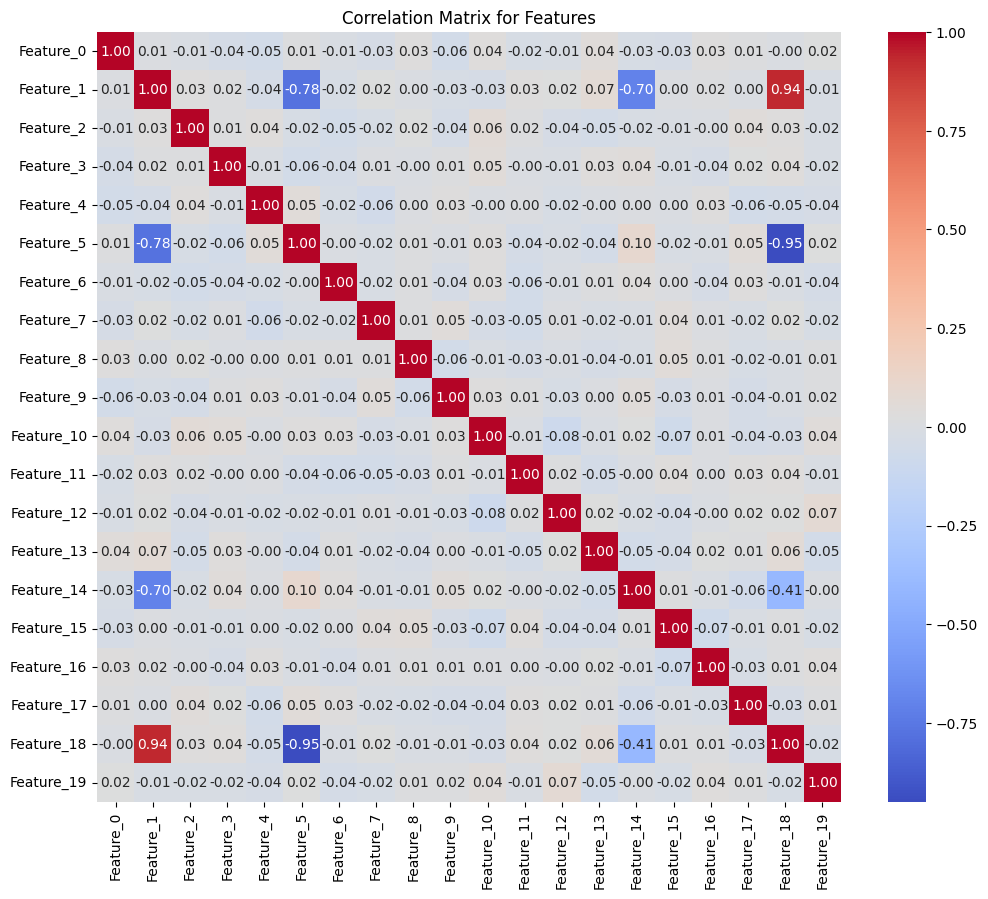

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Features')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

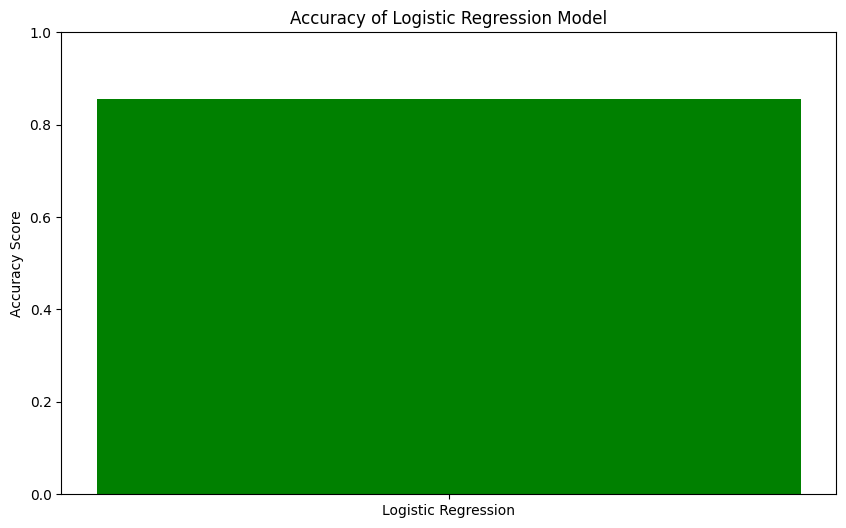

In [ ]:
# Plotting the bar graph for accuracy
plt.figure(figsize=(10, 6))
plt.bar(['Logistic Regression'], [accuracy], color='green')
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Logistic Regression Model')
plt.ylim(0, 1)
plt.show()

In [ ]:
# Training the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Making predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

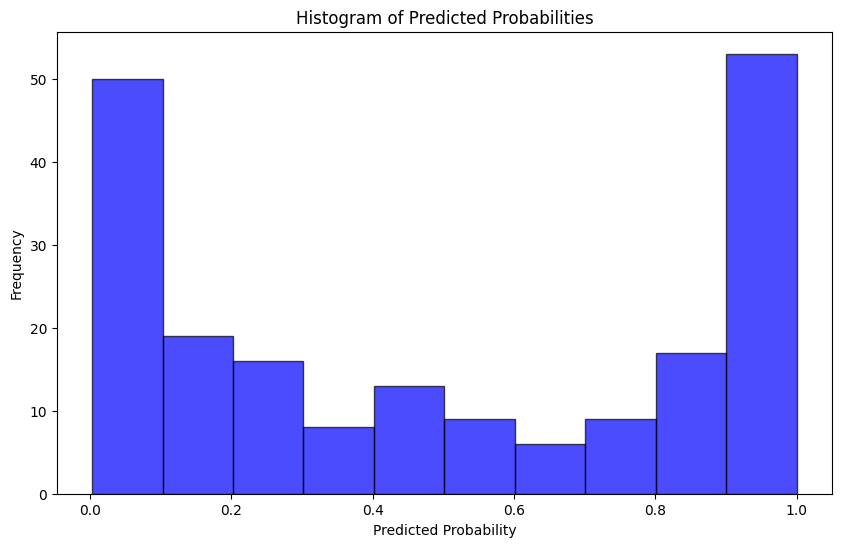

In [ ]:
# Plotting the histogram for predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba, bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()

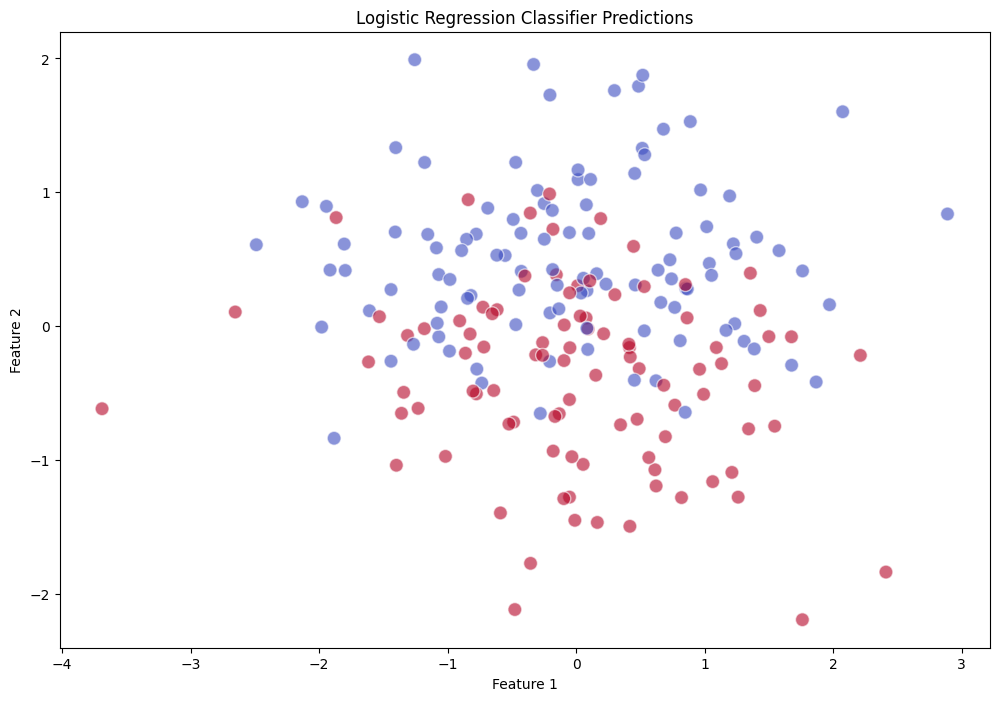

In [ ]:
# Plotting the first two features of the dataset for visualization
plt.figure(figsize=(12, 8))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='coolwarm', alpha=0.6, edgecolor='w', s=100)
plt.title("Logistic Regression Classifier Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
# For demonstration purposes, create a synthetic classification dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of bootstrap samples
n_bootstrap = 100
accuracy_scores = []

In [ ]:
for _ in range(n_bootstrap):
    # Create a bootstrap sample
    sample_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_sampled = X_train[sample_indices]
    y_sampled = y_train[sample_indices]

    # Train a Logistic Regression model
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_sampled, y_sampled)

    # Evaluate the model on the original test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

In [ ]:
# Calculate and print the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation of Accuracy: {std_accuracy:.4f}')

Mean Accuracy: 0.8498
Standard Deviation of Accuracy: 0.0133


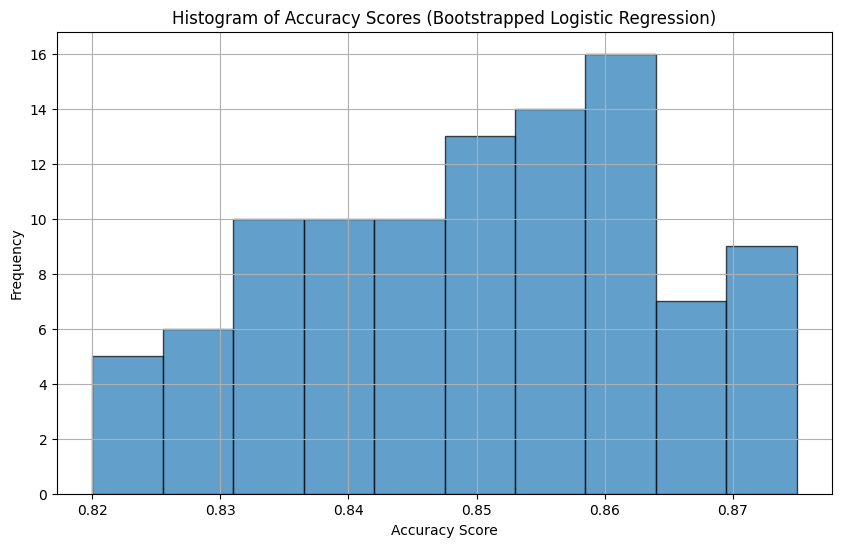

In [ ]:
# Convert accuracy scores to numpy array for easy manipulation
accuracy_scores = np.array(accuracy_scores)

# Plotting the histogram of accuracy scores
plt.figure(figsize=(10, 6))
plt.hist(accuracy_scores, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Accuracy Score')
plt.ylabel('Frequency')
plt.title('Histogram of Accuracy Scores (Bootstrapped Logistic Regression)')
plt.grid(True)
plt.show()

In [ ]:
# Number of bootstrap samples
n_bootstrap = 100
accuracy_scores = []

for _ in range(n_bootstrap):
    # Create a bootstrap sample
    sample_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_sampled = X_train[sample_indices]
    y_sampled = y_train[sample_indices]

    # Train a Logistic Regression model
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_sampled, y_sampled)

    # Evaluate the model on the original test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

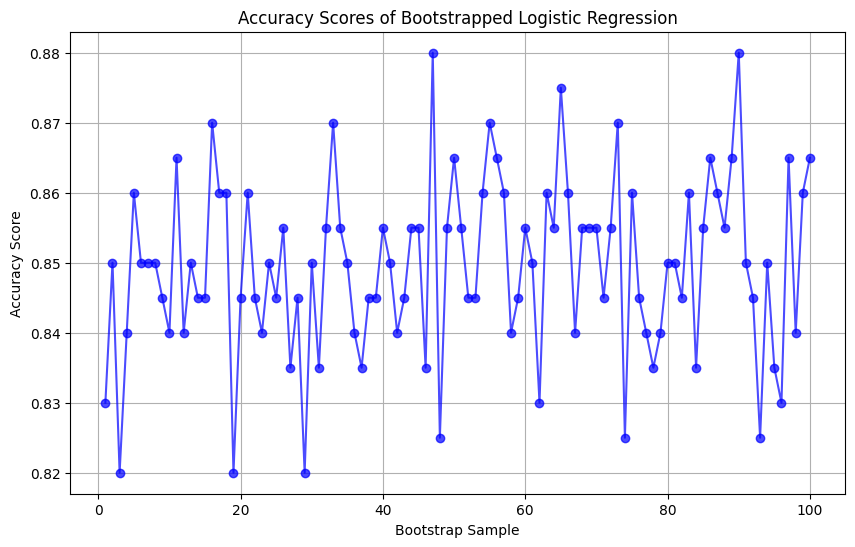

In [ ]:
# Convert accuracy scores to numpy array for easy manipulation
accuracy_scores = np.array(accuracy_scores)

# Plotting the graph of accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_bootstrap + 1), accuracy_scores, marker='o', linestyle='-', color='b', alpha=0.7)
plt.xlabel('Bootstrap Sample')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Bootstrapped Logistic Regression')
plt.grid(True)
plt.show()

In [ ]:
# Calculate and print the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation of Accuracy: {std_accuracy:.4f}')

Mean Accuracy: 0.8494
Standard Deviation of Accuracy: 0.0127


KNN Classification


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# For demonstration purposes, create a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the k-Nearest Neighbors (k-NN) classifier
k = 5  # Choose the number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Making predictions
y_pred = knn.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81        93
           1       0.88      0.75      0.81       107

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



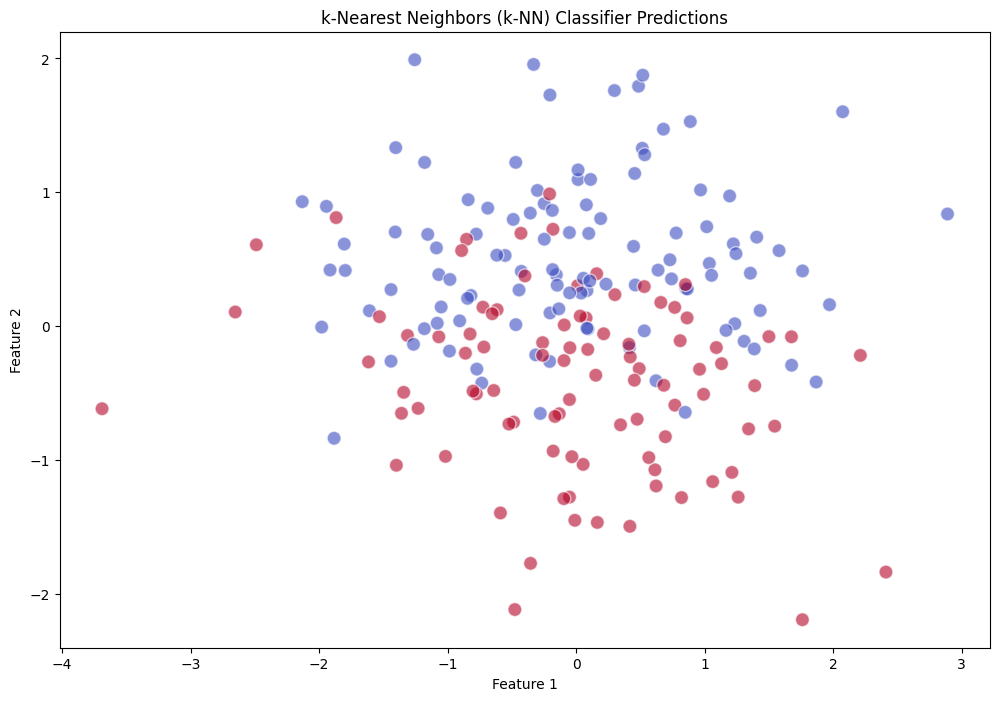

In [ ]:
# Plotting the first two features of the dataset for visualization
plt.figure(figsize=(12, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', alpha=0.6, edgecolor='w', s=100)
plt.title("k-Nearest Neighbors (k-NN) Classifier Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
# Number of bootstrap samples
n_bootstrap = 100
accuracy_scores = []

for _ in range(n_bootstrap):
    # Create a bootstrap sample
    sample_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_sampled = X_train[sample_indices]
    y_sampled = y_train[sample_indices]

    # Train a k-Nearest Neighbors (k-NN) classifier
    k = 5  # Choose the number of neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_sampled, y_sampled)

    # Evaluate the model on the original test set
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


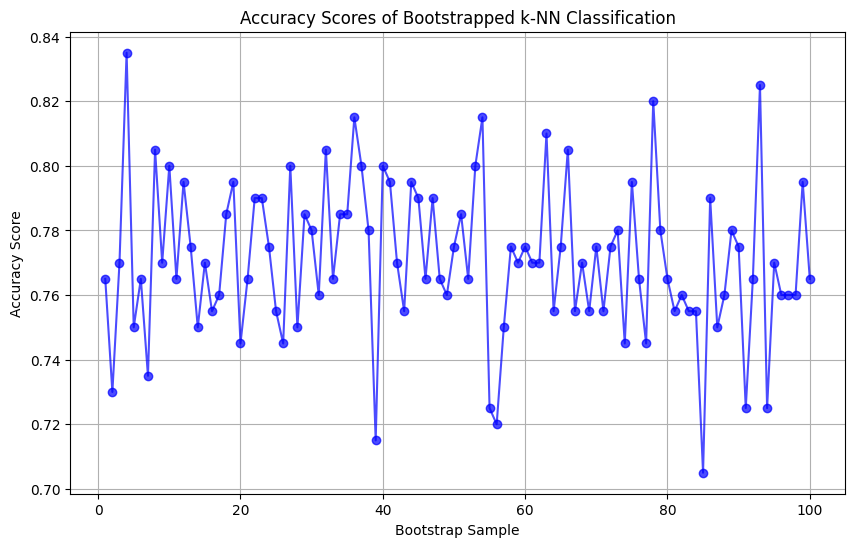

In [ ]:
# Convert accuracy scores to numpy array for easy manipulation
accuracy_scores = np.array(accuracy_scores)

# Plotting the graph of accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_bootstrap + 1), accuracy_scores, marker='o', linestyle='-', color='b', alpha=0.7)
plt.xlabel('Bootstrap Sample')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Bootstrapped k-NN Classification')
plt.grid(True)
plt.show()

In [ ]:
# Calculate and print the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation of Accuracy: {std_accuracy:.4f}')

Mean Accuracy: 0.7711
Standard Deviation of Accuracy: 0.0240


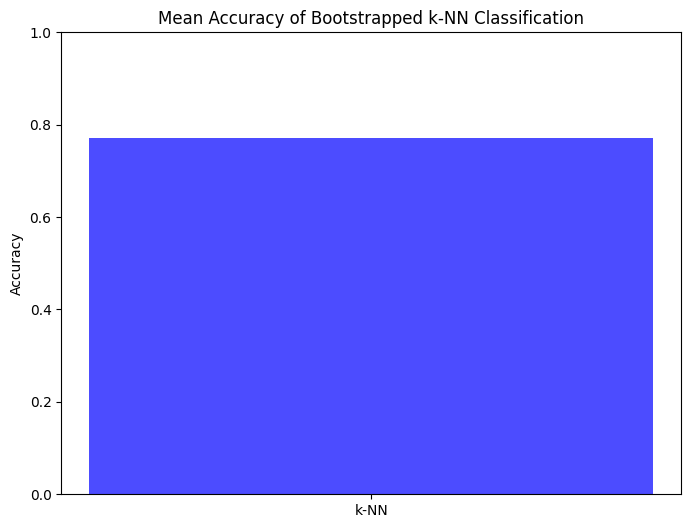

In [ ]:
# Plotting the bar graph of mean accuracy
mean_accuracy = np.mean(accuracy_scores)
plt.figure(figsize=(8, 6))
plt.bar(['k-NN'], [mean_accuracy], color='blue', alpha=0.7)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Mean Accuracy of Bootstrapped k-NN Classification')
plt.show()

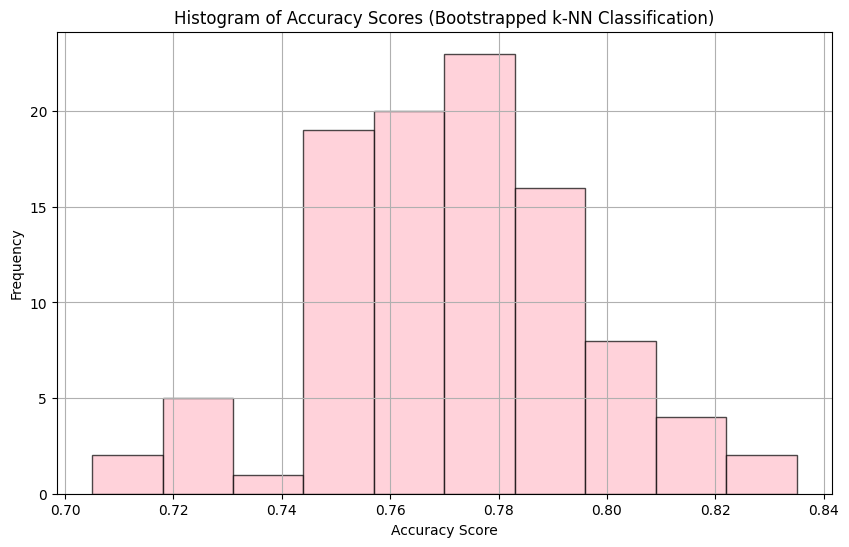

In [ ]:
# Plotting the histogram of accuracy scores
plt.figure(figsize=(10, 6))
plt.hist(accuracy_scores, bins=10,color='pink', edgecolor='black', alpha=0.7)
plt.xlabel('Accuracy Score')
plt.ylabel('Frequency')
plt.title('Histogram of Accuracy Scores (Bootstrapped k-NN Classification)')
plt.grid(True)
plt.show()

In [ ]:
# For demonstration purposes, create a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Convert to DataFrame for easier manipulation
feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df['Target'], test_size=0.2, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Calculate the correlation matrix for the features
correlation_matrix = df[feature_names].corr()

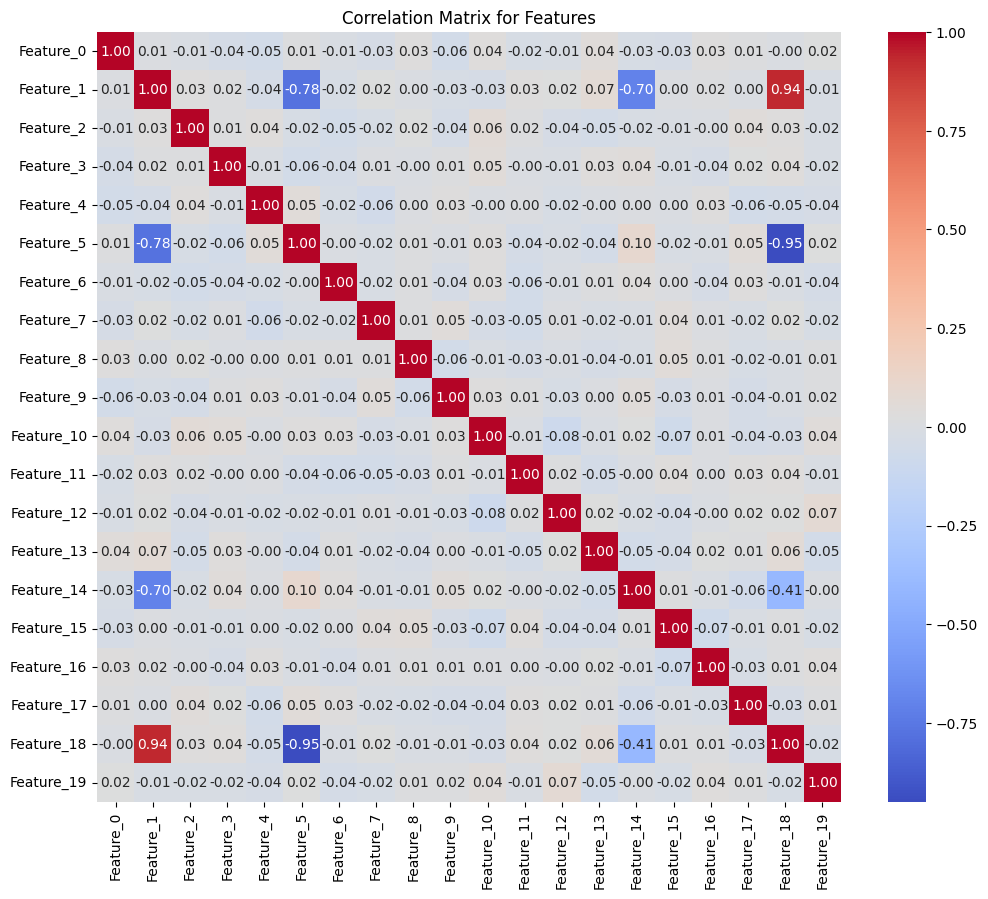

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Features')
plt.show()

Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Training the Naive Bayes classifier (Gaussian Naive Bayes)
nb = GaussianNB()
nb.fit(X_train, y_train)

# Making predictions
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.795
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80        93
           1       0.89      0.70      0.79       107

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.79       200
weighted avg       0.81      0.80      0.79       200



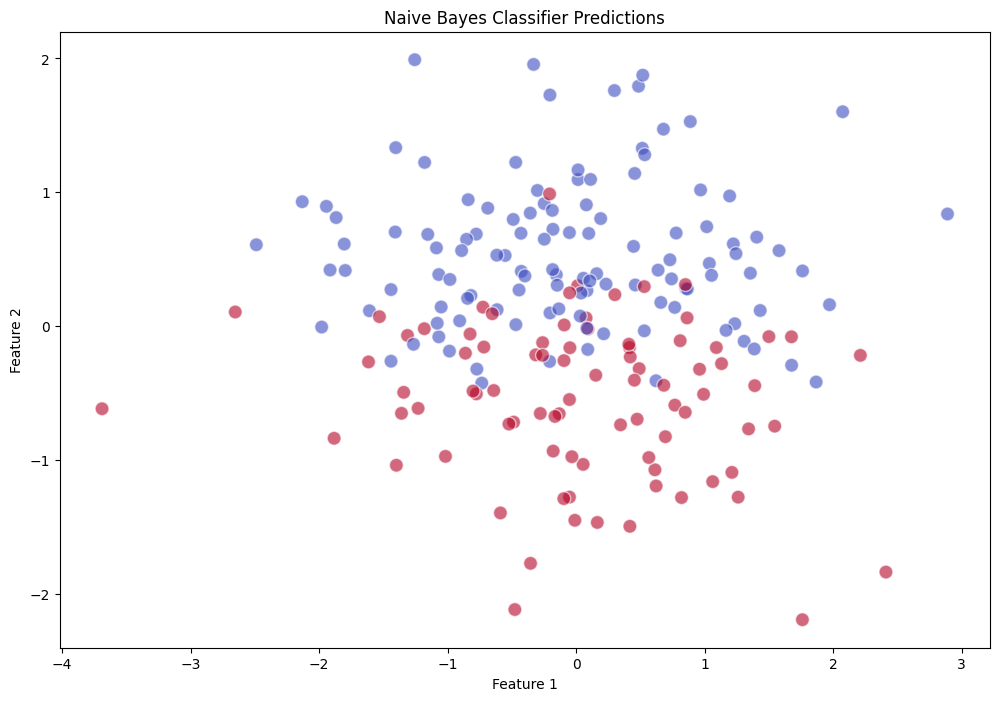

In [ ]:
# Plotting the first two features of the dataset for visualization
plt.figure(figsize=(12, 8))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='coolwarm', alpha=0.6, edgecolor='w', s=100)
plt.title("Naive Bayes Classifier Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
# For demonstration purposes, create a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Convert to DataFrame for easier manipulation
feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df['Target'], test_size=0.2, random_state=42)


In [ ]:
# Train a Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Calculate the correlation matrix for the features
correlation_matrix = df[feature_names].corr()

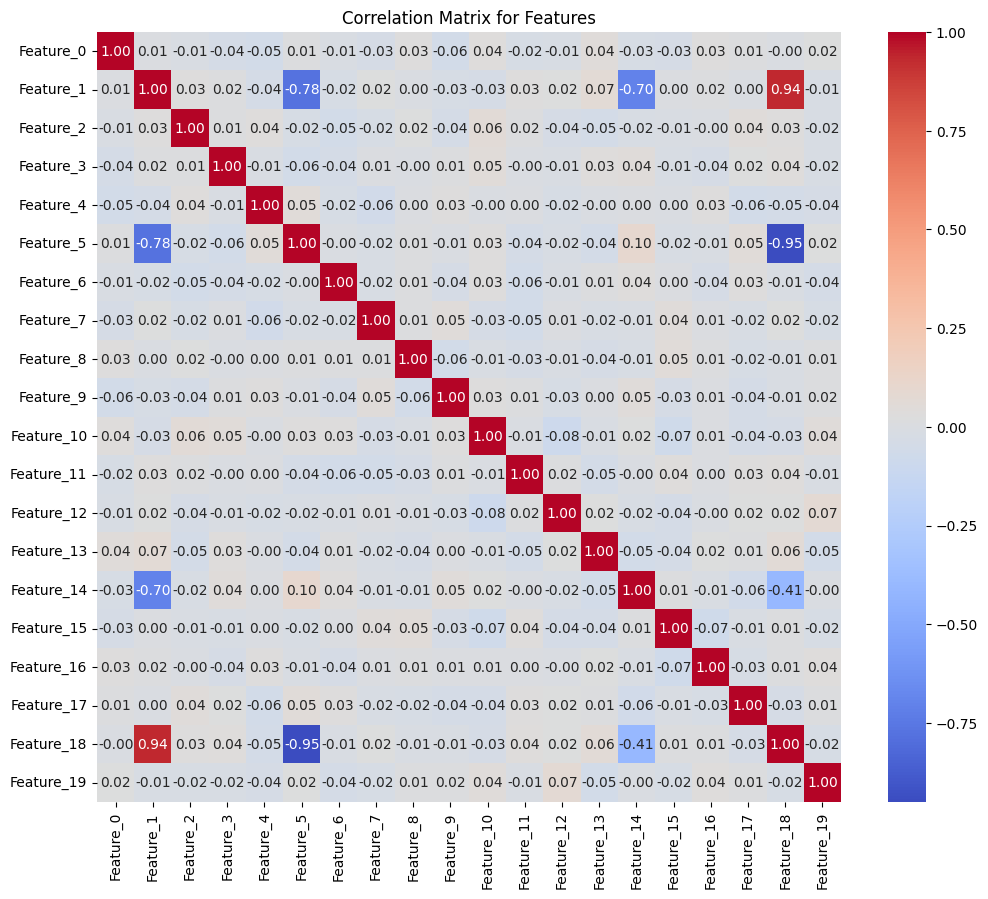

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Features')
plt.show()

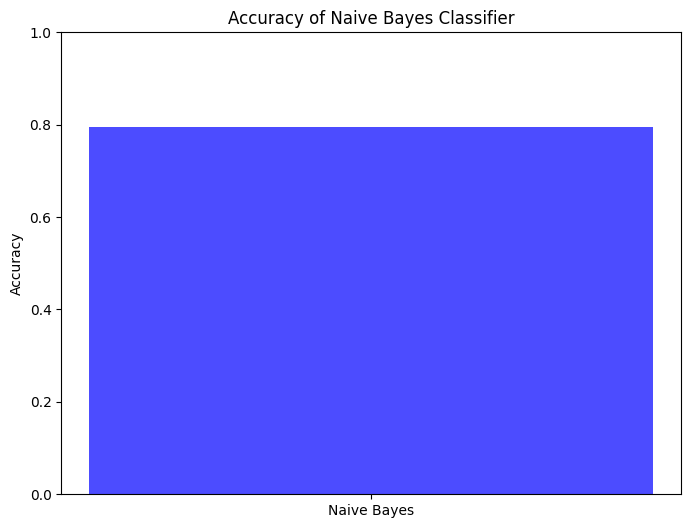

In [ ]:
# Plotting the bar graph for accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Naive Bayes'], [accuracy], color='blue', alpha=0.7)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy of Naive Bayes Classifier')
plt.show()

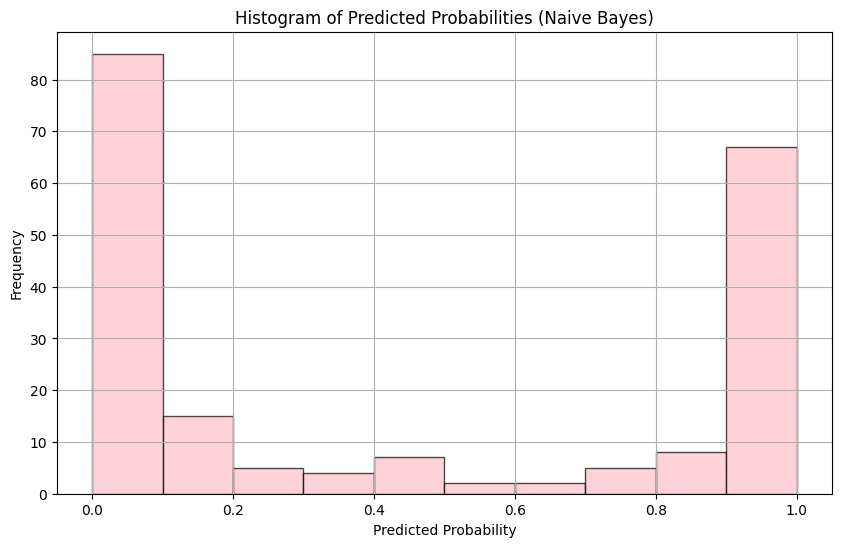

In [ ]:
# Plotting the histogram of predicted probabilities
y_pred_proba = nb.predict_proba(X_test)[:, 1]
plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba, bins=10, color='pink', edgecolor='black', alpha=0.7)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities (Naive Bayes)')
plt.grid(True)
plt.show()

In [ ]:
# Number of bootstrap samples
n_bootstrap = 100
accuracy_scores = []

for _ in range(n_bootstrap):
    # Create a bootstrap sample
    sample_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_sampled = X_train.iloc[sample_indices]
    y_sampled = y_train.iloc[sample_indices]

    # Train a Naive Bayes classifier (Gaussian Naive Bayes)
    nb = GaussianNB()
    nb.fit(X_sampled, y_sampled)

    # Evaluate the model on the original test set
    y_pred = nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


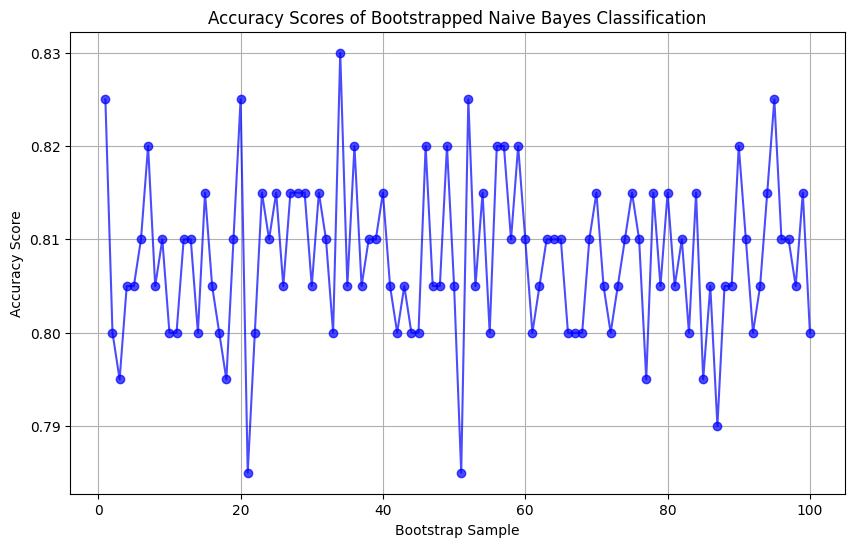

In [ ]:
# Convert accuracy scores to numpy array for easy manipulation
accuracy_scores = np.array(accuracy_scores)

# Plotting the graph of accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_bootstrap + 1), accuracy_scores, marker='o', linestyle='-', color='b', alpha=0.7)
plt.xlabel('Bootstrap Sample')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Bootstrapped Naive Bayes Classification')
plt.grid(True)
plt.show()


In [ ]:
# Calculate and print the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation of Accuracy: {std_accuracy:.4f}')

Mean Accuracy: 0.8080
Standard Deviation of Accuracy: 0.0085


Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [ ]:
# Generate synthetic data (moon-shaped clusters)
X, _ = make_moons(n_samples=1000, noise=0.1, random_state=42)

<ipython-input-101-86936b7964e4>:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



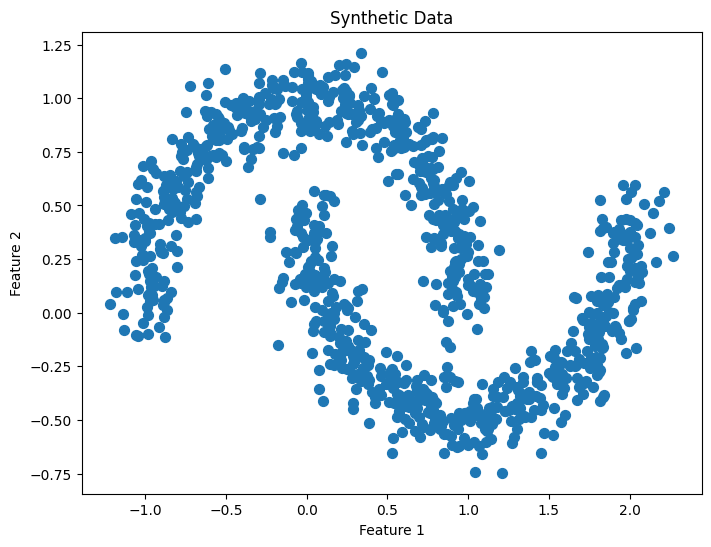

In [ ]:
# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title('Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# Applying DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)


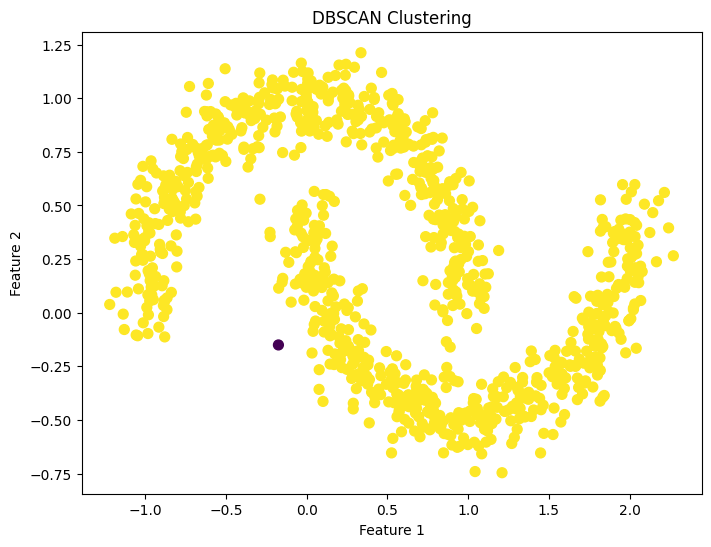

In [ ]:
# Visualize the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


<ipython-input-105-b5f507877052>:6: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



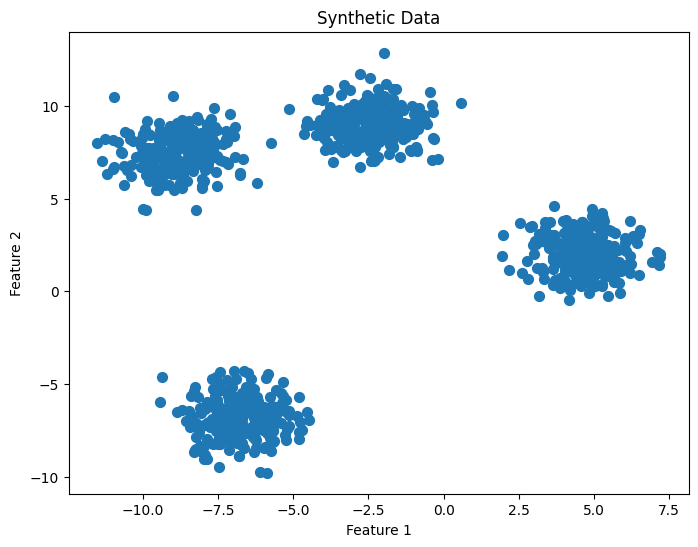

In [ ]:
# Generate synthetic data
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=1.0, random_state=42)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title('Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# Generate synthetic data
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=1.0, random_state=42)

# Convert to DataFrame for easier manipulation
feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)

# Applying DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

In [ ]:
# Add the cluster labels to the DataFrame
df['Cluster'] = labels

# Calculate the correlation matrix for the features
correlation_matrix = df[feature_names].corr()


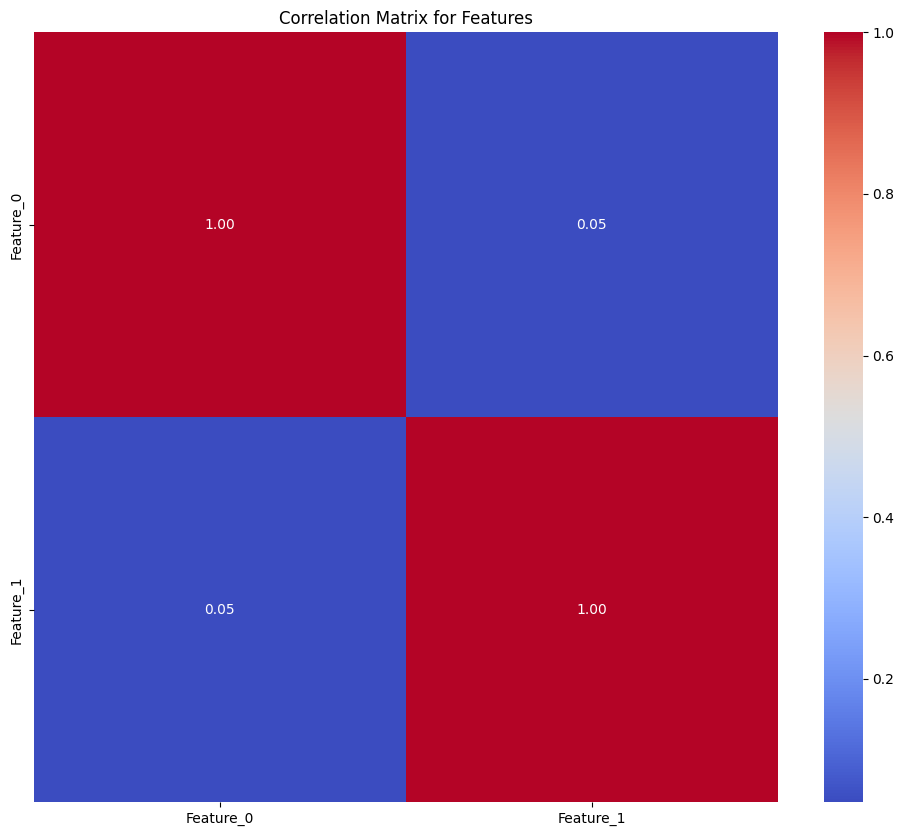

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Features')
plt.show()

In [ ]:
# Applying K-Means clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



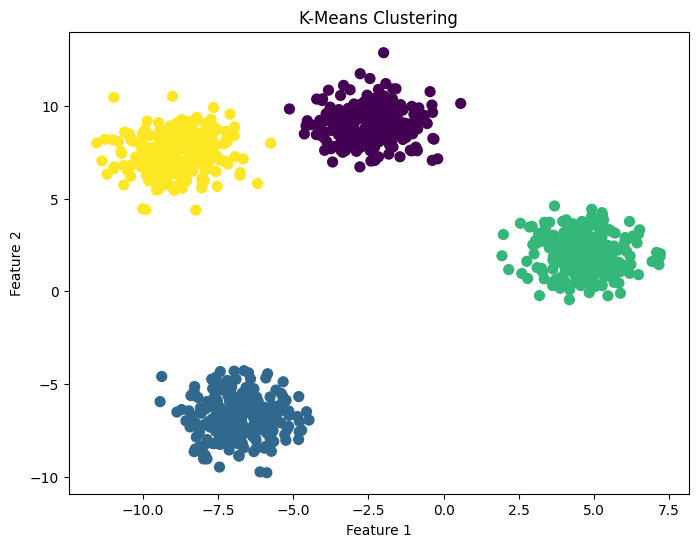

In [ ]:
# Visualize the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

# Generate synthetic data
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=1.0, random_state=42)


<ipython-input-112-86936b7964e4>:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



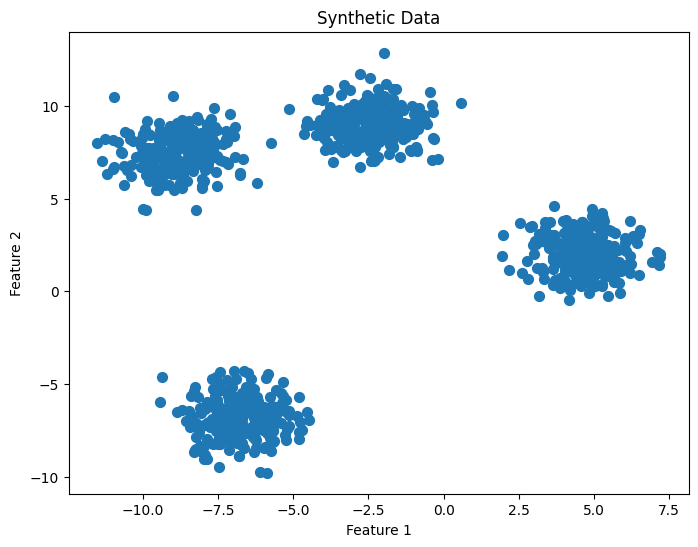

In [ ]:
# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title('Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# Applying KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Add the cluster labels to the DataFrame
df['Cluster'] = labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



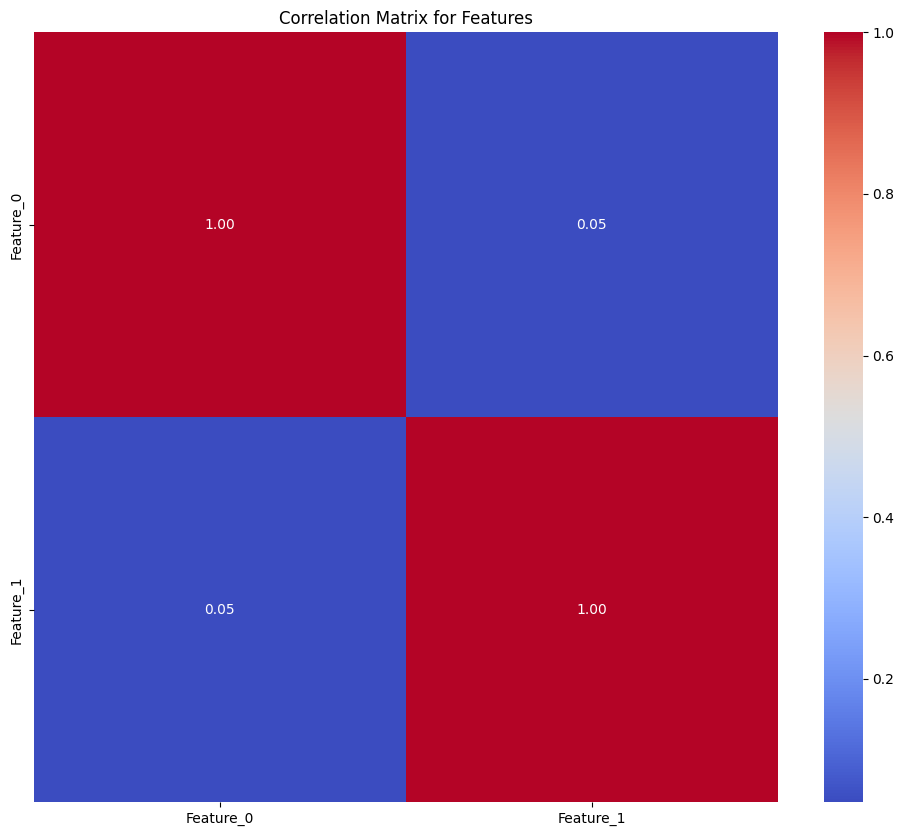

In [ ]:
# Calculate the correlation matrix for the features
correlation_matrix = df[feature_names].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Features')
plt.show()

In [ ]:
# Applying Gaussian Mixture Model (GMM) clustering
k = 4  # Number of clusters
gmm = GaussianMixture(n_components=k, random_state=42)
labels = gmm.fit_predict(X)

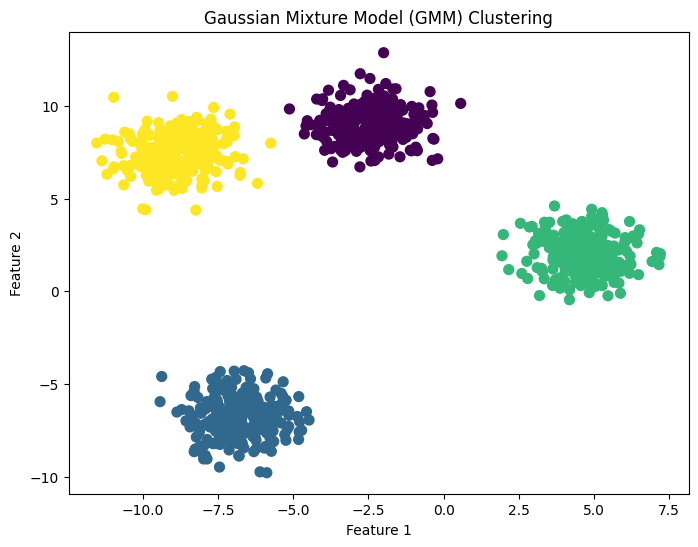

In [ ]:
# Visualize the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title('Gaussian Mixture Model (GMM) Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage

<ipython-input-118-b5f507877052>:6: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



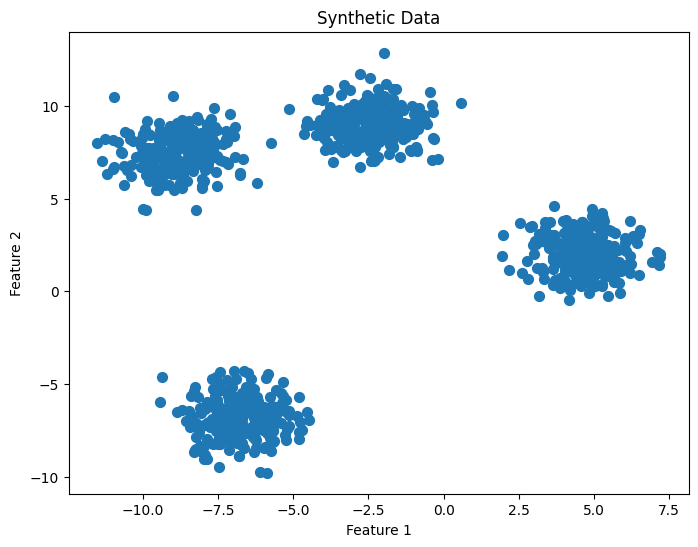

In [ ]:
# Generate synthetic data
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=1.0, random_state=42)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title('Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# Convert to DataFrame for easier manipulation
feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)

# Applying Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=4, random_state=42)
labels = gmm.fit_predict(X)

# Add the cluster labels to the DataFrame
df['Cluster'] = labels


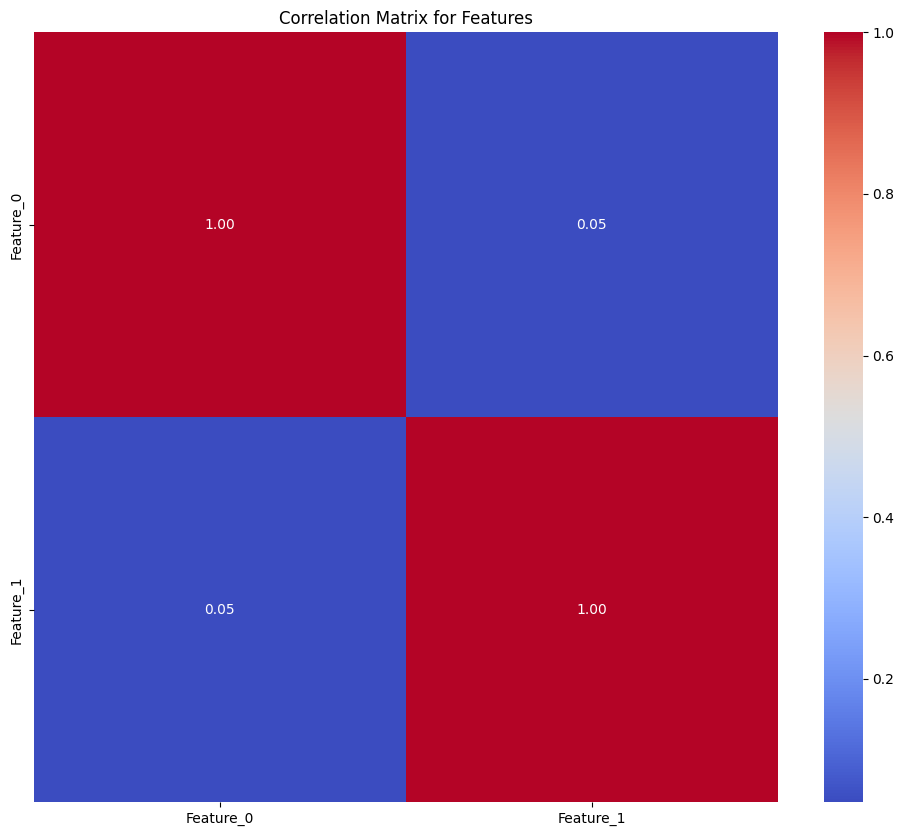

In [ ]:
# Calculate the correlation matrix for the features
correlation_matrix = df[feature_names].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Features')
plt.show()

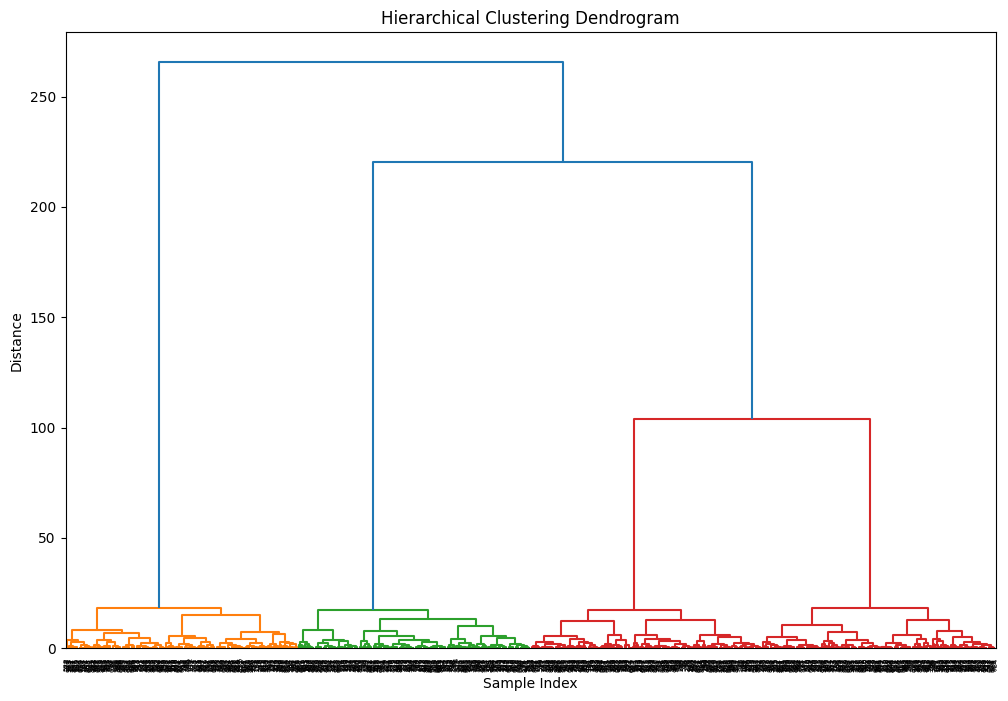

In [ ]:
# Applying Hierarchical Clustering (Agglomerative)
Z = linkage(X, method='ward')  # Perform hierarchical/agglomerative clustering
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [ ]:
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

In [ ]:
# Generate synthetic data
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=1.0, random_state=42)

# Convert to DataFrame for easier manipulation
feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)

# Standardizing the features (important for hierarchical clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Applying hierarchical clustering
Z = linkage(X_scaled, method='ward')

# Assign cluster labels
labels = fcluster(Z, t=4, criterion='maxclust')

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

# Calculate the correlation matrix for the features
correlation_matrix = df[feature_names].corr()

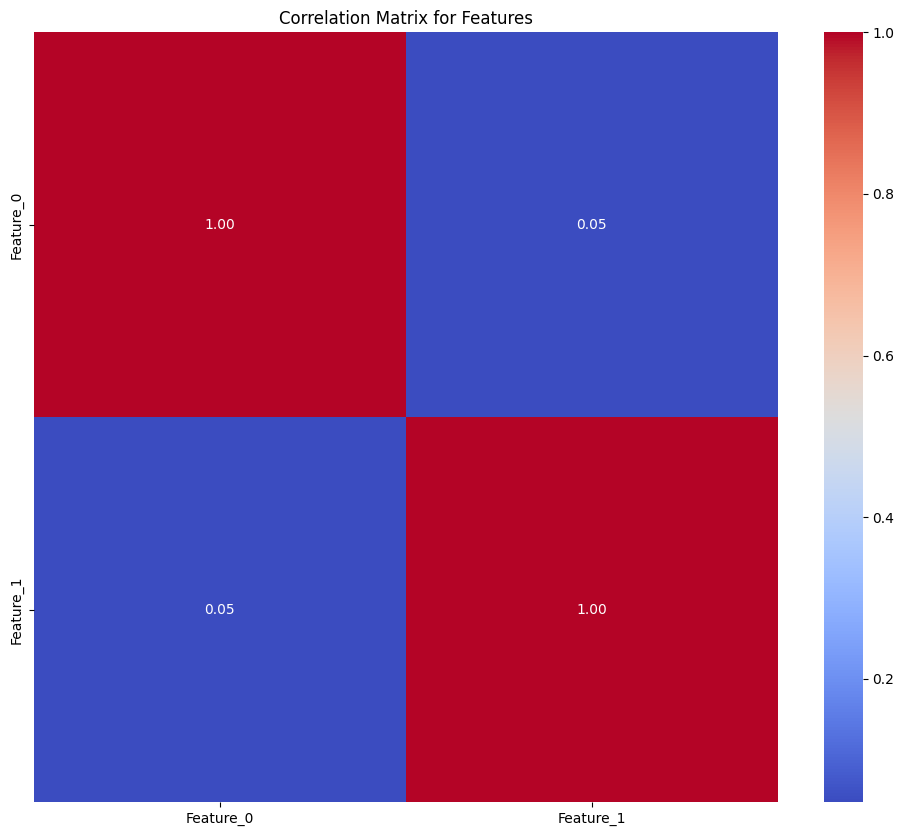

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Features')
plt.show()
